<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/3%EC%9E%A5%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 03 장 선형 회귀


## 최소제곱법

최소제곱법을 통해 $y = ax + b$ 함수를 만들고자 할 때, $a$ 를 구하는 방법은 다음과 같다.

$$ a = \frac{Σ{(x - x의 평균)(y - y의 평균)}}{\Sigma{(x - x의 평균)}}$$

행렬식으로는 다음과 같다.

$$ X = (A^{T}A)^{-1}A^{T}Y$$

In [1]:
# 최소제곱법
import numpy as np

data_x = np.array([2, 4, 6, 8])
data_y = np.array([81, 93, 91, 97])

mean_x = np.mean(data_x)
mean_y = np.mean(data_y)

a = ((np.dot((data_x - mean_x), (data_y - mean_y))).sum()/(np.dot((data_x - mean_x), (data_x - mean_x))).sum())
b = mean_y - mean_x * a
print(a, b)

# 최소제곱법 행렬식
A1 = np.reshape(data_x, (4,1))
A2 = np.ones(4)
A2 = np.reshape(A2, (4,1))
A = np.concatenate((A1, A2), axis = 1)

X = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(), A)), A.transpose()), data_y)

print(A)
print(X)

2.3 79.0
[[2. 1.]
 [4. 1.]
 [6. 1.]
 [8. 1.]]
[ 2.3 79. ]


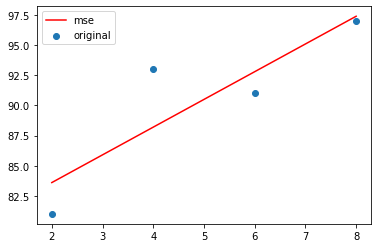

In [3]:
# 좌표 평면으로 확인하기

import matplotlib.pyplot as plt

Y = X[0]*data_x + X[1]
plt.scatter(data_x, data_y, label = 'original')
plt.plot(data_x, Y, label = 'mse', color = 'r')
plt.legend()
plt.show()

'최소 제곱법'을 통해서 기울기 a 와 절편 b 를 찾아 간단한 선형 예측 모델을 만들 수 있었다.

하지만 이는 변수가 하나일 때만 적용하기 쉽고 앞선 예제와 같이 변수가 17개나 되는 경우에는 '일단 그리고 조금씩 수정해나가기' 방식을 많이 사용한다. 

이 과정에서 '평균 제곱 오차(mean squared error)'를 통해 오차를 평가하고 모델을 발전시킨다.

예를 들어서 위 예시에 $y = 3x + 76$이라는 예측 모델을 대입하면 아래와 같다.


|공부한 시간(x)|성적(실제 값, y)|예측 값| **오차**|
|------|---|---|---|
|2|81|82|**1**|
|4|93|88|**-5**|
|6|91|94|**3**|
|8|97|10|**3**|

$오차의 합 = \sum\limits_{i}^n (\hat{y}_{i}-y_{i})^{2}$, $(\hat{y}_{i} = 실제 값, y_{i} = 예측 값)$

$평균 제곱 오차 = \frac{1}{n}\sum(\hat{y}_{i}-y_{i})^{2}$

In [5]:
#평균 제곱 오차 확인

fake_a_b = [3, 76]
data_x = np.array([2, 4, 6, 8])
data_y = np.array([81, 93, 91, 97])

x = np.reshape(data_x, (4, 1))
y = np.reshape(data_y, (4, 1))
data = np.concatenate((x, y), axis = 1)

print(data)

[[ 2 81]
 [ 4 93]
 [ 6 91]
 [ 8 97]]


In [7]:
def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

# 교재에서는 x 와 y가 numpy array 가 아닌 list 로 표현 되어있기 때문에 numpy array 로 변환하는 한 단계 추가
#def mse_val(predict_result, y):
#  return mse(np.array(predict_result), np.array(y))

predict_result = []

# 모든 x 값을 대입, result list 완성

for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제 점수 =%.f, 예측 점수 =%.f"%(x[i], y[i], predict(x[i])))

# list 에 반복문 바로 적용
predict_result2 = []
for i in x:
  predict_result2.append(predict(i))

print(predict_result == predict_result2)

공부시간=2, 실제 점수 =81, 예측 점수 =82
공부시간=4, 실제 점수 =93, 예측 점수 =88
공부시간=6, 실제 점수 =91, 예측 점수 =94
공부시간=8, 실제 점수 =97, 예측 점수 =100
True


In [8]:
# 최종 MSE 출력

print("mse 최종값: " + str(mse(predict_result, y)))

mse 최종값: 11.0


이를 통해 처음 가정한 a = 3, b = 76은 오차가 약 11.0임을 확인할 수 있다. 이제 오차를 줄이면서 새로운 선을 그어볼 예정이다. 다음 장에서 오차를 줄이는 방법인 '경사 하강법'에 대해 알아볼 것이다.